### In this notebook we'll try to evaluate VGG thanks to our abstract engine

In [1]:
import sys
sys.path.append('../src')
sys.path.append('../src')
import torch
from torch import sparse
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import vgg19
from abstractModule import AbstractLinear as AL
from abstractModule import AbstractReLU as AR
from abstractModule import AbstractMaxpool2D as AM
from abstractModule import abstractAvgPool2D as AMP
device=torch.device("cpu")
%load_ext autoreload
%autoreload 2

In [2]:
model = vgg19(pretrained=True)
model

/home/guillaume/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/guillaume/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [3]:
def compute_memory(x:torch.tensor)->str:
    memory = torch.prod(torch.tensor(x.size()))*4/10**9
    return f"Memory footprint of abstract domain {memory.numpy():.2f} GB"


In [4]:
import torch
import torch.nn as nn

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        
        # Couches de convolution
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv8 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv9 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.conv10 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv11 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv12 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv13 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv14 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv15 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv16 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        
        # Couches de ReLU
        self.relu = nn.ReLU(inplace=True)
        
        # Couches de pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Couches Fully Connected (FC)
        self.fc1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(25088, 4096),
        
        )
        
        self.fc2 = nn.Sequential(nn.Flatten(),
            nn.Linear(4096, 4096),
        )
        
        self.fc3 = nn.Sequential(nn.Flatten(),nn.Linear(4096, 1000))
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.relu(x)

        x = self.pool(x)
        
        x = self.conv3(x)
        x = self.relu(x) 
        x = self.conv4(x)
        x = self.relu(x)

        x = self.pool(x)

        x = self.conv5(x)
        x = self.relu(x)
        x = self.conv6(x)
        x = self.relu(x)
        x = self.conv7(x)
        x = self.relu(x)
        x = self.conv8(x)
        x = self.relu(x)

        x = self.pool(x)

        x = self.conv9(x)
        x = self.relu(x)
        x = self.conv10(x)
        x = self.relu(x)
        x = self.conv11(x)
        x = self.relu(x)
        x = self.conv12(x)
        x = self.relu(x)

        x = self.pool(x)

        x = self.conv13(x)
        x = self.relu(x)
        x = self.conv14(x)
        x = self.relu(x)
        x = self.conv15(x)
        x = self.relu(x)
        x = self.conv16(x)
        x = self.relu(x)

        x = self.pool(x)
        print(x.shape)
        x = self.avgpool(x)
 
        
        
        # Fully Connected Layers
        x = self.fc1(x)
        x= self.relu(x)
        x = self.fc2(x)
        x= self.relu(x)
        x = self.fc3(x)
        x= self.relu(x)
     
        
        return x
    
    def abstract_forward(self,x,add_symbol=False,device=torch.device("cpu")):
        self.device=device
        
        x_true = x
        x_true = x_true[0].unsqueeze(0)
        print(compute_memory(x))
        AR.max_symbol = 8000
        AM.max_symbol = 8000
        AR.recycling = 1
        AM.recycling = 1
        print(compute_memory(x))
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv1,x,x_true,device=self.device)
        print(x.shape)
        print(f"layer CONV1 passed, {len(x)-2} symbols")
      
        print(compute_memory(x))
            
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol, device =self.device)
        print(x.shape)
        print(f"layer relu 1 passed, {len(x)-2} symbols")
        print(compute_memory(x))

        print(f"nombre de zeros {torch.sum(x==0)/torch.prod(torch.tensor(x.size()))*100:.2f}%")
        
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv2,x,x_true,device=self.device)
        print(x.shape)
        print(f"layer conv2 1 passed, {len(x[0])-2} symbols")
        print(f"nombre de zeros {torch.sum(x==0)/torch.prod(torch.tensor(x.size()))*100:.2f}%")
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print("abstract relu conv2 passed")
        print(x.shape)
        print(compute_memory(x))
        print(f"nombre de zeros {torch.sum(x==0)/torch.prod(torch.tensor(x.size()))*100:.2f}%")
        AR.max_symbol = 12000
        AM.max_symbol = 12000
        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer pool 1 passed, {len(x[0])-2} symbols")
        print(f"nombre de zeros {torch.sum(x==0)/torch.prod(torch.tensor(x.size()))*100:.2f}%")
      
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv3,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv3 1 passed, {len(x[0])-2} symbols")
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer relu 3 passed, {len(x[0])-2} symbols")

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv4,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(compute_memory(x))
        print(f"layer conv4 1 passed, {len(x)-2} symbols")

        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer relu 4 passed, {len(x)-2} symbols")

        AR.max_symbol = 24000
        AM.max_symbol = 24000
        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer pool 2 passed, {len(x)-2} symbols")
      
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv5,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv5 1 passed, {len(x)-2} symbols")

        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer relu 5 passed, {len(x)-2} symbols")

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv6,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv6 1 passed, {len(x)-2} symbols")

        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer relu 6 passed, {len(x)-2} symbols")


        
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv7,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv7  passed, {len(x)-2} symbols")

        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer relu 7 passed, {len(x)-2} symbols")

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv8,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv8 passed, {len(x)-2} symbols")
        
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        AR.max_symbol = 48000
        AM.max_symbol = 48000

        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)
        
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv9,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv9 passed, {len(x)-2} symbols")

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv10,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv10 passed, {len(x)-2} symbols")
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv11,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv11 passed, {len(x)-2} symbols")
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv12,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv12 1 passed, {len(x)-2} symbols")
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        AR.max_symbol = 2*96000
        AM.max_symbol = 2*96000


        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)
        
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv13,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv13 passed, {len(x)-2} symbols")
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv14,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv14 1 passed, {len(x)-2} symbols")
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv15,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv15 1 passed, {len(x)-2} symbols")
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv16,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv16 1 passed, {len(x)-2} symbols")
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      
        AR.max_symbol = 1_000_000
        AM.max_symbol = 1_000_000

        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)
        
        

        x,x_min,x_max,x_true = AMP.abstract_AvgPool2D(self.avgpool,x,x_true,device=self.device)
 
        
        
        # Fully Connected Layers
        x,x_min,x_max,x_true = AL.abstract_linear(self.fc1,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer lin 1 passed, {len(x)-2} symbols")
        x,x_min,x_max,x_true = AR.abstract_relu(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        
        x,x_min,x_max,x_true = AL.abstract_linear(self.fc2,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer lin2 passed, {len(x)-2} symbols")
        x,x_min,x_max,x_true = AR.abstract_relu(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        
        
        x,x_min,x_max,x_true = AL.abstract_linear(self.fc3,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer lin3 passed, {len(x)-2} symbols")
        x,x_min,x_max,x_true = AR.abstract_relu(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        return x,x_min,x_max,x_true


In [5]:
C=CustomCNN()


In [6]:
AR.max_symbol = 8000

In [7]:
AR.max_symbol

8000

In [8]:
num_layer_C = 0
num_layer_model = 0
for param_1 in C.parameters():
    num_layer_C +=1

for param_2 in model.parameters():
    num_layer_model += 1
print(num_layer_C,num_layer_model)
for param_1, param_2 in zip(C.parameters(), model.parameters()):
    print(param_1.data.shape, param_2.data.shape)
    param_1.data = param_2.data

for param_1, param_2 in zip(C.parameters(), model.parameters()):

    print(torch.sum(param_1.data) -torch.sum(param_2.data))

38 38
torch.Size([64, 3, 3, 3]) torch.Size([64, 3, 3, 3])
torch.Size([64]) torch.Size([64])
torch.Size([64, 64, 3, 3]) torch.Size([64, 64, 3, 3])
torch.Size([64]) torch.Size([64])
torch.Size([128, 64, 3, 3]) torch.Size([128, 64, 3, 3])
torch.Size([128]) torch.Size([128])
torch.Size([128, 128, 3, 3]) torch.Size([128, 128, 3, 3])
torch.Size([128]) torch.Size([128])
torch.Size([256, 128, 3, 3]) torch.Size([256, 128, 3, 3])
torch.Size([256]) torch.Size([256])
torch.Size([256, 256, 3, 3]) torch.Size([256, 256, 3, 3])
torch.Size([256]) torch.Size([256])
torch.Size([256, 256, 3, 3]) torch.Size([256, 256, 3, 3])
torch.Size([256]) torch.Size([256])
torch.Size([256, 256, 3, 3]) torch.Size([256, 256, 3, 3])
torch.Size([256]) torch.Size([256])
torch.Size([512, 256, 3, 3]) torch.Size([512, 256, 3, 3])
torch.Size([512]) torch.Size([512])
torch.Size([512, 512, 3, 3]) torch.Size([512, 512, 3, 3])
torch.Size([512]) torch.Size([512])
torch.Size([512, 512, 3, 3]) torch.Size([512, 512, 3, 3])
torch.Size([

In [9]:
C.eval()
model.eval()
with torch.no_grad():
    x=torch.randn(1,3,128,128)
    print(torch.sum(C(x.detach())-model(x.detach())))

torch.Size([1, 512, 4, 4])
tensor(684.1490)


torch.Size([1, 3, 72, 72])


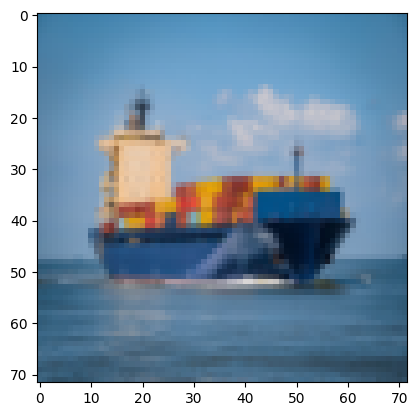

In [10]:
from PIL import Image
import torch
import torchvision.transforms as transforms

image = Image.open("../images/bateau.jpg")

transform = transforms.Compose([
    transforms.Resize((72, 72)),
    transforms.ToTensor(),
   
    
])
image_tensor = transform(image)

image_tensor = image_tensor.unsqueeze(0)
print(image_tensor.size())
import matplotlib.pyplot as plt
plt.imshow(image_tensor[0].permute(1, 2, 0))

In [11]:
import gc

In [12]:
dim_abstract=5184
alpha_value = 0.0001
span =torch.max(image_tensor)-torch.min(image_tensor)
print(f"span={span}")
from abstract import abstractTensor as AT 

x=AT(image_tensor.squeeze(0),alpha=alpha_value*span*torch.ones(dim_abstract)).abstract_tensor()

print(x.shape)

span=0.9490196108818054
torch.Size([5186, 3, 72, 72])


In [13]:

x=x.to(device)
C.eval()

with torch.no_grad():
   result,x_min,x_max,x_true= C.abstract_forward(x.detach(),add_symbol=True,device=device)

print(compute_memory(result))

Memory footprint of abstract domain 0.32 GB
Memory footprint of abstract domain 0.32 GB
torch.Size([5186, 64, 72, 72])
layer CONV1 passed, 5184 symbols
Memory footprint of abstract domain 6.88 GB
torch.Size([5221, 64, 72, 72])
layer relu 1 passed, 5219 symbols
Memory footprint of abstract domain 6.93 GB
nombre de zeros 99.88%
torch.Size([5221, 64, 72, 72])
layer conv2 1 passed, 62 symbols
nombre de zeros 99.52%
abstract relu conv2 passed
torch.Size([5686, 64, 72, 72])
Memory footprint of abstract domain 7.55 GB
nombre de zeros 99.82%
torch.Size([7830, 64, 36, 36])
Memory footprint of abstract domain 2.60 GB
layer pool 1 passed, 62 symbols
nombre de zeros 99.84%
torch.Size([7830, 128, 36, 36])
Memory footprint of abstract domain 5.20 GB
layer conv3 1 passed, 126 symbols
torch.Size([8290, 128, 36, 36])
Memory footprint of abstract domain 5.50 GB
layer relu 3 passed, 126 symbols
torch.Size([8290, 128, 36, 36])
Memory footprint of abstract domain 5.50 GB
Memory footprint of abstract domain

In [14]:
_ , index = torch.topk(result[0], 9)

print(index)
print(f"Evaluation effectuée sur VGG19, sur un domaine abstrait comportant {dim_abstract} symboles, avec un alpha de {alpha_value}.")
print(f"l'évaluation a généré {len(result)-2-dim_abstract} symboles de bruits.")

import json
with open("VGG_index/imagenet_class_index.json") as f:
    class_idx = json.load(f)
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

print("Les 9 classes les plus probables sont :")
labels = [idx2label[i] for i in index]
print(labels)

print(f"y_min       =  {x_min[index]}")
print(f"y_max       =  {x_max[index]}")
print(f"center Ztp  =  {result[0][index]}")
print(f"y_true      =  {x_true.squeeze(0)[index]}")
print(f"y_max-x_min =  {x_max[index]-x_min[index]}")
print(f"Trash symbol=  {result[-1][index]}")

tensor([510, 540, 536, 628, 517, 554, 460, 913, 403])
Evaluation effectuée sur VGG19, sur un domaine abstrait comportant 5184 symboles, avec un alpha de 0.0001.
l'évaluation a généré 8555 symboles de bruits.
Les 9 classes les plus probables sont :
['container_ship', 'drilling_platform', 'dock', 'liner', 'crane', 'fireboat', 'breakwater', 'wreck', 'aircraft_carrier']
y_min       =  tensor([28.5752, 24.2408, 21.4367, 20.7161, 17.7283, 16.2876, 16.0974, 15.5609,
        15.5059])
y_max       =  tensor([29.2815, 24.9445, 21.9931, 21.2701, 18.1943, 16.7765, 16.4873, 16.1044,
        16.0746])
center Ztp  =  tensor([28.9283, 24.5926, 21.7149, 20.9931, 17.9613, 16.5321, 16.2923, 15.8326,
        15.7903])
y_true      =  tensor([28.9492, 24.6098, 21.7294, 21.0108, 17.9723, 16.5437, 16.3045, 15.8460,
        15.8019])
y_max-x_min =  tensor([0.7063, 0.7037, 0.5564, 0.5540, 0.4660, 0.4889, 0.3899, 0.5434, 0.5687])
Trash symbol=  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[28.57517 ]
 [24.24079 ]
 [21.436686]
 [20.716118]
 [17.728334]
 [16.287626]
 [16.09739 ]
 [15.560927]
 [15.505932]]
[0 1 2 3 4 5 6 7 8]
(9, 2)
[[28.57517  29.281496]
 [24.24079  24.944468]
 [21.436686 21.993128]
 [20.716118 21.27013 ]
 [17.728334 18.194307]
 [16.287626 16.77653 ]
 [16.09739  16.487297]
 [15.560927 16.104362]
 [15.505932 16.07462 ]]
(9, 1)
(9, 1)


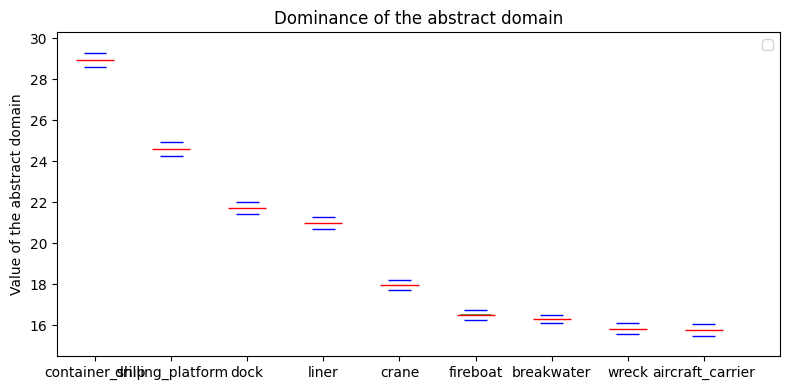

In [15]:

import matplotlib.pyplot as plt
import numpy as np
y_min       =  np.expand_dims(np.array(x_min[index]),axis=1)
y_max       =  np.expand_dims(np.array(x_max[index]),axis=1)
center_Ztp  =  np.expand_dims(np.array(result[0][index]),axis=1)
y_true      =  np.expand_dims(np.array(x_true.squeeze(0)[index]),axis=1)
y_max_minus_y_min =  np.array(x_max[index]-x_min[index])
Trash_symbol=  np.array(result[-1][index])


print(y_min)



x = np.arange(len(y_min))
print(x)
D =np.stack((y_min,y_max),axis=1).reshape(-1,2)
print(D.shape)
print(D)

print(center_Ztp.shape)
print(y_true.shape)
# plot:

fig,ax = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)
ax.eventplot(D, orientation="vertical", linewidth=1,color='blue',linelengths=0.3)
ax.eventplot(y_true, orientation="vertical", linewidth=0.5,color='green',linelengths=0.4)
ax.eventplot(center_Ztp, orientation="vertical", linewidth=1,color='red',linelengths=0.5)

ax.set(xlim=(-0.5, 9),xticks=x,xticklabels=labels,
       ylim=(np.min(D)-1, np.max(D)+1))
plt.ylabel("Value of the abstract domain")
plt.title("Dominance of the abstract domain")
plt.legend()
plt.show()

In [16]:
model.eval()
res =model(image_tensor)
_ , index = torch.topk(res, 8)
print(index)

tensor([[510, 540, 536, 628, 517, 554, 460, 913]])


In [17]:
import json
with open("VGG_index/imagenet_class_index.json") as f:
    class_idx = json.load(f)
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

print("Les 8 classes les plus probables sont :")
print([idx2label[i] for i in index[0]])

Les 8 classes les plus probables sont :
['container_ship', 'drilling_platform', 'dock', 'liner', 'crane', 'fireboat', 'breakwater', 'wreck']


tensor(510)
torch.Size([5184])


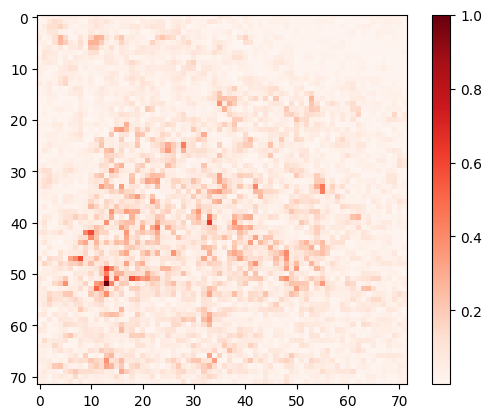

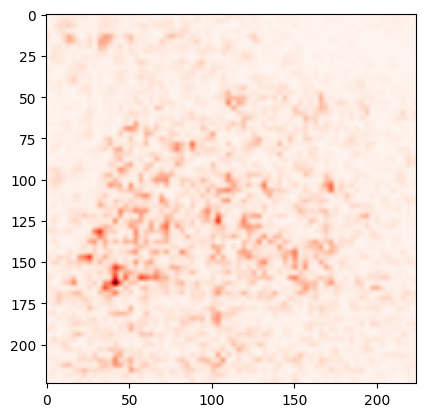

In [18]:
value=torch.argmax(result[0])
print(value)
concat= torch.abs(result[1:5185,value])
print(concat.size())
concat = concat/ (torch.max(concat)-torch.min(concat))
concat = concat.reshape(72,72)
plt.imshow(torch.abs(concat.cpu()).numpy(), cmap='Reds')
plt.colorbar()
plt.show()
transform = transforms.Resize((224, 224))
heatmap = transform(concat.unsqueeze(0))
plt.imshow(heatmap[0].cpu().numpy(), cmap='Reds')
heatmap.shape

heatmap = torch.cat((heatmap, torch.zeros_like(heatmap[0]).unsqueeze(0), torch.zeros_like(heatmap[0]).unsqueeze(0)), dim=0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 224, 224])


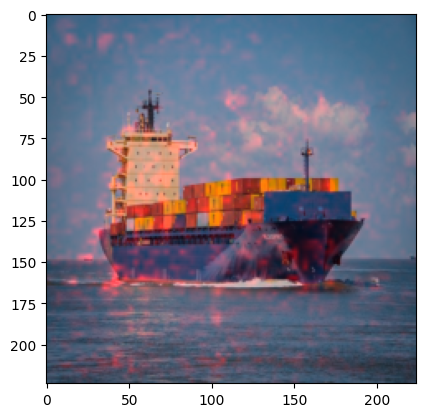

In [19]:
from PIL import Image
import torch
import torchvision.transforms as transforms

image = Image.open("../images/bateau.jpg")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
image_tensor = transform(image)

image_tensor = image_tensor.unsqueeze(0)
image_heatmaped = 0.8*image_tensor + 1.5*heatmap
print(image_heatmaped.size())
import matplotlib.pyplot as plt
plt.imshow(image_heatmaped[0].permute(1, 2, 0))

In [20]:
AR.max_symbol

1000000

## Principe de sélection des nouveaux symboles
Pour comprendre le principe de sélection des symboles portants les poids les plus élevés en VA, on peut observer le code ci-dessous.

In [21]:
import torch

In [22]:
x =torch.randn(1000,29098)
len(x)-2+len(torch.where(x[-1].flatten()!=0)[0])

30096

In [23]:
import torch
x = torch.zeros(2,8)
x[0,5]=1
x[1,2]=0.02
x[1,3]=0.02
x[1,5]=0.04

recycle_symbols =2
device = torch.device("cpu")
print(x)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0200, 0.0200, 0.0000, 0.0400, 0.0000, 0.0000]])


In [24]:
new_eps = torch.topk((x[-1].flatten()),recycle_symbols,largest=True).indices.to(device)
index = torch.arange(len(new_eps)).to(device)
new_eps_batch_shape = x[-1].expand(len(new_eps)+1,-1).shape
new_eps_batch = torch.zeros(new_eps_batch_shape).to(device)
new_eps_batch[index,new_eps]=x[-1][new_eps]

x[-1].flatten()[new_eps]=0
new_eps_batch[-1] =x[-1].flatten()


x=x[:-1]

x = torch.cat((x,new_eps_batch),dim=0)

In [25]:
print(x)


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0400, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0200, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0200, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])


In [26]:

x=x[:-1]
print(x)

x = torch.cat((x,new_eps_batch),dim=0) 
x

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0400, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0200, 0.0000, 0.0000, 0.0000, 0.0000]])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0400, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0200, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0400, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0200, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0200, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [27]:
import torch.nn as nn
from abstractModule import AbstractLinear as AL
fc = nn.Sequential(nn.Flatten(),nn.Linear(8,2))

x, x_min, x_max, x_true = AL.abstract_linear(fc,x,x[0].unsqueeze(0),device=device)

In [28]:
x.shape

torch.Size([6, 2])

In [29]:
x

tensor([[ 0.2197,  0.0053],
        [ 0.0128,  0.0141],
        [-0.0024,  0.0070],
        [ 0.0128,  0.0141],
        [-0.0024,  0.0070],
        [ 0.0006,  0.0004]])